In [ ]:
import pandas as pd 

In [ ]:
import seaborn as sns

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
df_dispo_alim = pd.read_csv('/content/DisponibiliteAlimentaire_2017.csv', sep=',', encoding='utf-8')

In [ ]:
df_pop = pd.read_csv('/content/Population_2000_2018.csv', sep=',', encoding='utf-8')

In [ ]:
df_pib = pd.read_csv('/content/PIB.csv', sep=',', encoding='utf-8')

**Disponibilité Alimentaire**

In [ ]:
df_dispo_alim.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [ ]:
df_dispo_alim.shape #176600 lignes et 14 colonnes

(176600, 14)

In [ ]:
#valeurs manquantes
df_dispo_alim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [ ]:
#duplicatas
df_dispo_alim.duplicated().sum()

0

In [ ]:
df_dispo_alim['Zone'].nunique() #il y a 174 pays

174

In [ ]:
df_dispo_alim['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

In [ ]:
df_dispo_alim['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [ ]:
df_dispo_alim['Année'].unique()

array([2017])

In [ ]:
#filtre des produits pour ne garder que "Viande de Volailles", puis séléction des colonnes utiles
A=df_dispo_alim[df_dispo_alim['Produit'] =='Viande de Volailles'][['Zone', 'Élément', 'Valeur']]

In [ ]:
B =pd.pivot_table(A, values='Valeur', index=['Zone'], columns=['Élément'])
B=B.reset_index()
B.head()

Élément,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
2,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
3,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
4,Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0


In [ ]:
#valeurs manquantes
B.isna().mean()

Élément
Zone                                                             0.000000
Alimentation pour touristes                                      0.546512
Aliments pour animaux                                            0.994186
Autres utilisations (non alimentaire)                            0.802326
Disponibilité alimentaire (Kcal/personne/jour)                   0.000000
Disponibilité alimentaire en quantité (kg/personne/an)           0.000000
Disponibilité de matière grasse en quantité (g/personne/jour)    0.000000
Disponibilité de protéines en quantité (g/personne/jour)         0.000000
Disponibilité intérieure                                         0.011628
Exportations - Quantité                                          0.215116
Importations - Quantité                                          0.011628
Nourriture                                                       0.011628
Pertes                                                           0.610465
Production                    

In [ ]:
#filtre les colonnes qui ont trop de valeurs manquantes et qui ne seront pas utiles
df_dispo_alim2017 = B[['Zone', 'Disponibilité alimentaire en quantité (kg/personne/an)', 'Exportations - Quantité', 'Importations - Quantité', 'Nourriture', 'Production', 'Variation de stock']]
df_dispo_alim2017 = df_dispo_alim2017.rename(columns={"Disponibilité alimentaire en quantité (kg/personne/an)": "Disponibilité alimentaire"})
df_dispo_alim2017.head(3)

Élément,Zone,Disponibilité alimentaire,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock
0,Afghanistan,1.53,NaN,29.0,55.0,28.0,0.0
1,Afrique du Sud,35.69,63.0,514.0,2035.0,1667.0,0.0
2,Albanie,16.36,0.0,38.0,47.0,13.0,4.0


In [ ]:
#valeurs manquantes
df_dispo_alim2017.isna().mean()

Élément
Zone                         0.000000
Disponibilité alimentaire    0.000000
Exportations - Quantité      0.215116
Importations - Quantité      0.011628
Nourriture                   0.011628
Production                   0.023256
Variation de stock           0.017442
dtype: float64

In [ ]:
#selection des pays pour lesquels les valeurs sur les exportations sont manquantes
exportations_nan = df_dispo_alim2017[df_dispo_alim2017['Exportations - Quantité'].isna()]['Zone'].to_list()

#retrait des pays pour lesquels les valeurs sur les exportations sont manquantes
df_dispo_alim2017 = df_dispo_alim2017[~df_dispo_alim2017['Zone'].isin(exportations_nan)]

#valeurs manquantes pour les autres colonnes, imputation par la moyenne
df_dispo_alim2017 = df_dispo_alim2017.fillna(df_dispo_alim2017.mean()) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
df_dispo_alim2017.isna().mean()

Élément
Zone                         0.0
Disponibilité alimentaire    0.0
Exportations - Quantité      0.0
Importations - Quantité      0.0
Nourriture                   0.0
Production                   0.0
Variation de stock           0.0
dtype: float64

In [ ]:
df_dispo_alim2017.shape

(135, 7)

**Population**

In [ ]:
df_pop.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [ ]:
#valeurs manquantes
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [ ]:
#duplicatas
df_pop.duplicated().sum()

0

In [ ]:
df_pop['Code zone'].nunique() # il y a 238 pays

238

In [ ]:
df_pop['Élément'].unique()

array(['Population totale'], dtype=object)

In [ ]:
df_pop['Année'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [ ]:
#selection de l'année 2017 et filtre des colonnes qui ne seront pas utiles
df_pop2017 = df_pop[df_pop['Année']==2017][['Zone', 'Valeur']]

#colonne Valeur renommée Population
df_pop2017 = df_pop2017.rename(columns={"Valeur": "Population"})
df_pop2017

,Zone,Population
17,Afghanistan,36296.113
36,Afrique du Sud,57009.756
55,Albanie,2884.169
74,Algérie,41389.189
93,Allemagne,82658.409
...,...,...
4333,Venezuela (République bolivarienne du),29402.484
4352,Viet Nam,94600.648
4371,Yémen,27834.819
4390,Zambie,16853.599


**PIB / habitant**

In [ ]:
df_pib.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,513.085978,X,Sources internationales sûres,NaN
1,MK,Indicateurs macro,202,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6121.876572,X,Sources internationales sûres,NaN
2,MK,Indicateurs macro,3,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4514.204908,X,Sources internationales sûres,NaN
3,MK,Indicateurs macro,4,Algérie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4109.701336,X,Sources internationales sûres,NaN
4,MK,Indicateurs macro,79,Allemagne,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,44552.061000,X,Sources internationales sûres,NaN


In [ ]:
df_pib.isna().mean()

Code Domaine              0.0
Domaine                   0.0
Code zone (FAO)           0.0
Zone                      0.0
Code Élément              0.0
Élément                   0.0
Code Produit              0.0
Produit                   0.0
Code année                0.0
Année                     0.0
Unité                     0.0
Valeur                    0.0
Symbole                   0.0
Description du Symbole    0.0
Note                      1.0
dtype: float64

In [ ]:
#dupicatas
df_pib.duplicated().sum()

0

In [ ]:
#selection des colonnes utiles 
df_pib = df_pib.rename(columns={"Valeur": "Pib par habitant"})

#colonne Valeur renommée Pib par habitant
df_pib = df_pib[['Zone', 'Pib par habitant']]
df_pib.head()

,Zone,Pib par habitant
0,Afghanistan,513.085978
1,Afrique du Sud,6121.876572
2,Albanie,4514.204908
3,Algérie,4109.701336
4,Allemagne,44552.061000


**JOINTURES**

In [ ]:
#jointure disponibilité alimentaire et population
df = pd.merge(df_dispo_alim2017, df_pop2017, on=['Zone'], how='left')

In [ ]:
#jointure, ajout des informations sur le pib par habitant
df = pd.merge(df, df_pib, on='Zone', how='left')

In [ ]:
df.head(3)

,Zone,Disponibilité alimentaire,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,Population,Pib par habitant
0,Afrique du Sud,35.69,63.0,514.0,2035.0,1667.0,0.0,57009.756,6121.876572
1,Albanie,16.36,0.0,38.0,47.0,13.0,4.0,2884.169,4514.204908
2,Algérie,6.38,0.0,2.0,264.0,275.0,0.0,41389.189,4109.701336


In [ ]:
#valeurs manquantes
df.isna().mean()

Zone                         0.000000
Disponibilité alimentaire    0.000000
Exportations - Quantité      0.000000
Importations - Quantité      0.000000
Nourriture                   0.000000
Production                   0.000000
Variation de stock           0.000000
Population                   0.000000
Pib par habitant             0.007407
dtype: float64

In [ ]:
#Valeur manquante, imputation par la moyenne
df = df.fillna(df.mean()) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
df.shape #dataframe final avec 172 lignes (soit 172 pays), et 9 colonnes

(135, 9)

**NORMALISER LES DONNÉES**

In [ ]:
df=df.set_index('Zone')

In [ ]:
df.describe()

,Disponibilité alimentaire,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,Population,Pib par habitant
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,1.350000e+02,135.000000
mean,22.490000,132.185185,107.392593,815.429630,894.170370,16.746269,4.958955e+04,16645.081041
std,14.728031,513.784440,204.110158,2373.485929,2766.072566,84.060718,1.715129e+05,20639.815127
min,0.450000,0.000000,0.000000,3.000000,0.000000,-119.000000,5.204500e+01,499.381240
25%,12.330000,0.000000,3.000000,46.000000,23.500000,0.000000,3.722678e+03,3659.390865
50%,20.330000,3.000000,23.000000,157.000000,118.000000,0.000000,9.845320e+03,7609.365034
75%,30.780000,32.000000,110.000000,634.000000,682.000000,11.000000,3.434122e+04,20486.595919
max,67.390000,4223.000000,1069.000000,18100.000000,21914.000000,859.000000,1.421022e+06,108431.931751


In [ ]:
from sklearn import preprocessing
df_norm = preprocessing.scale(df)
df_norm #données normalisées

array([[ 0.89958816, -0.13515952,  1.99951724, ..., -0.1999583 ,
         0.04342437, -0.51174863],
       [-0.41776329, -0.25823572, -0.34124239, ..., -0.15219643,
        -0.27332833, -0.5899305 ],
       [-1.09790646, -0.25823572, -0.51827463, ..., -0.1999583 ,
        -0.04799001, -0.60960171],
       ...,
       [-0.21671897, -0.25823572, -0.52810976, ..., -0.21189877,
        -0.19197605, -0.50729288],
       [ 2.26191903,  6.95442045,  0.0767504 , ...,  0.75527923,
         1.61224764,  2.11403991],
       [-1.22943716, -0.25823572, -0.49860439, ..., -0.1641369 ,
        -0.2864848 , -0.71650466]])

**OUTLIERS**

In [ ]:
#données normalisées sous forme de dataframe
df1 = pd.DataFrame(df_norm, columns=df.columns, index=df.index)

In [ ]:
#liste des outliers, zone pour lesquels il y a un z-score>=3 ou <=-3
list1 = df1.where(df1>=3).isnull().sum(axis=1).sort_values().reset_index().head(14)['Zone'].to_list()

list2 = df1.where(df1<=-3).isnull().sum(axis=1).sort_values().reset_index().head(14)

list = list1

#ajout de zones aux outliers après visualisation acp
list+=['Fédération de Russie']
list

["États-Unis d'Amérique",
 'Brésil',
 'Chine, continentale',
 'Japon',
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
 'Chine - RAS de Hong-Kong',
 'Inde',
 'Chine - RAS de Macao',
 'Israël',
 'Suisse',
 'Arabie saoudite',
 'Luxembourg',
 'Allemagne',
 'Mexique',
 'Fédération de Russie']

In [ ]:
#dataframe de départ (avant normalisation des données) sans les zone outliers
df = df[~df.index.isin(list)]

In [ ]:
#normalisation des données avec le nouveau dataframe, après suppression des outliers
from sklearn import preprocessing
df_norm = preprocessing.scale(df)
df_norm 

array([[ 1.04861276e+00,  1.29630135e-03,  3.92293255e+00,
         3.16064361e+00,  2.06078390e+00, -3.45705657e-01,
         8.63511004e-01, -4.53286393e-01],
       [-3.56483511e-01, -3.25371639e-01, -2.76271139e-01,
        -6.11352386e-01, -6.33320963e-01, -2.44754118e-01,
        -5.23128990e-01, -5.49868184e-01],
       [-1.08192897e+00, -3.25371639e-01, -5.93857973e-01,
        -1.99620429e-01, -2.06564328e-01, -3.45705657e-01,
         4.63328685e-01, -5.74168967e-01],
       [-7.78085081e-01, -3.25371639e-01,  1.83215256e+00,
        -1.02853932e-01, -5.86084541e-01, -3.45705657e-01,
         1.66855511e-01, -5.75003395e-01],
       [ 2.38683429e+00, -3.25371639e-01, -5.49748690e-01,
        -6.91042443e-01, -6.54495910e-01, -3.45705657e-01,
        -5.94573621e-01,  1.03105813e-01],
       [ 1.52473177e+00,  7.47965879e-01, -5.40926834e-01,
         2.82101218e+00,  2.86543191e+00, -3.45705657e-01,
         5.28604480e-01,  5.77007246e-02],
       [-3.78290489e-01, -3.253716

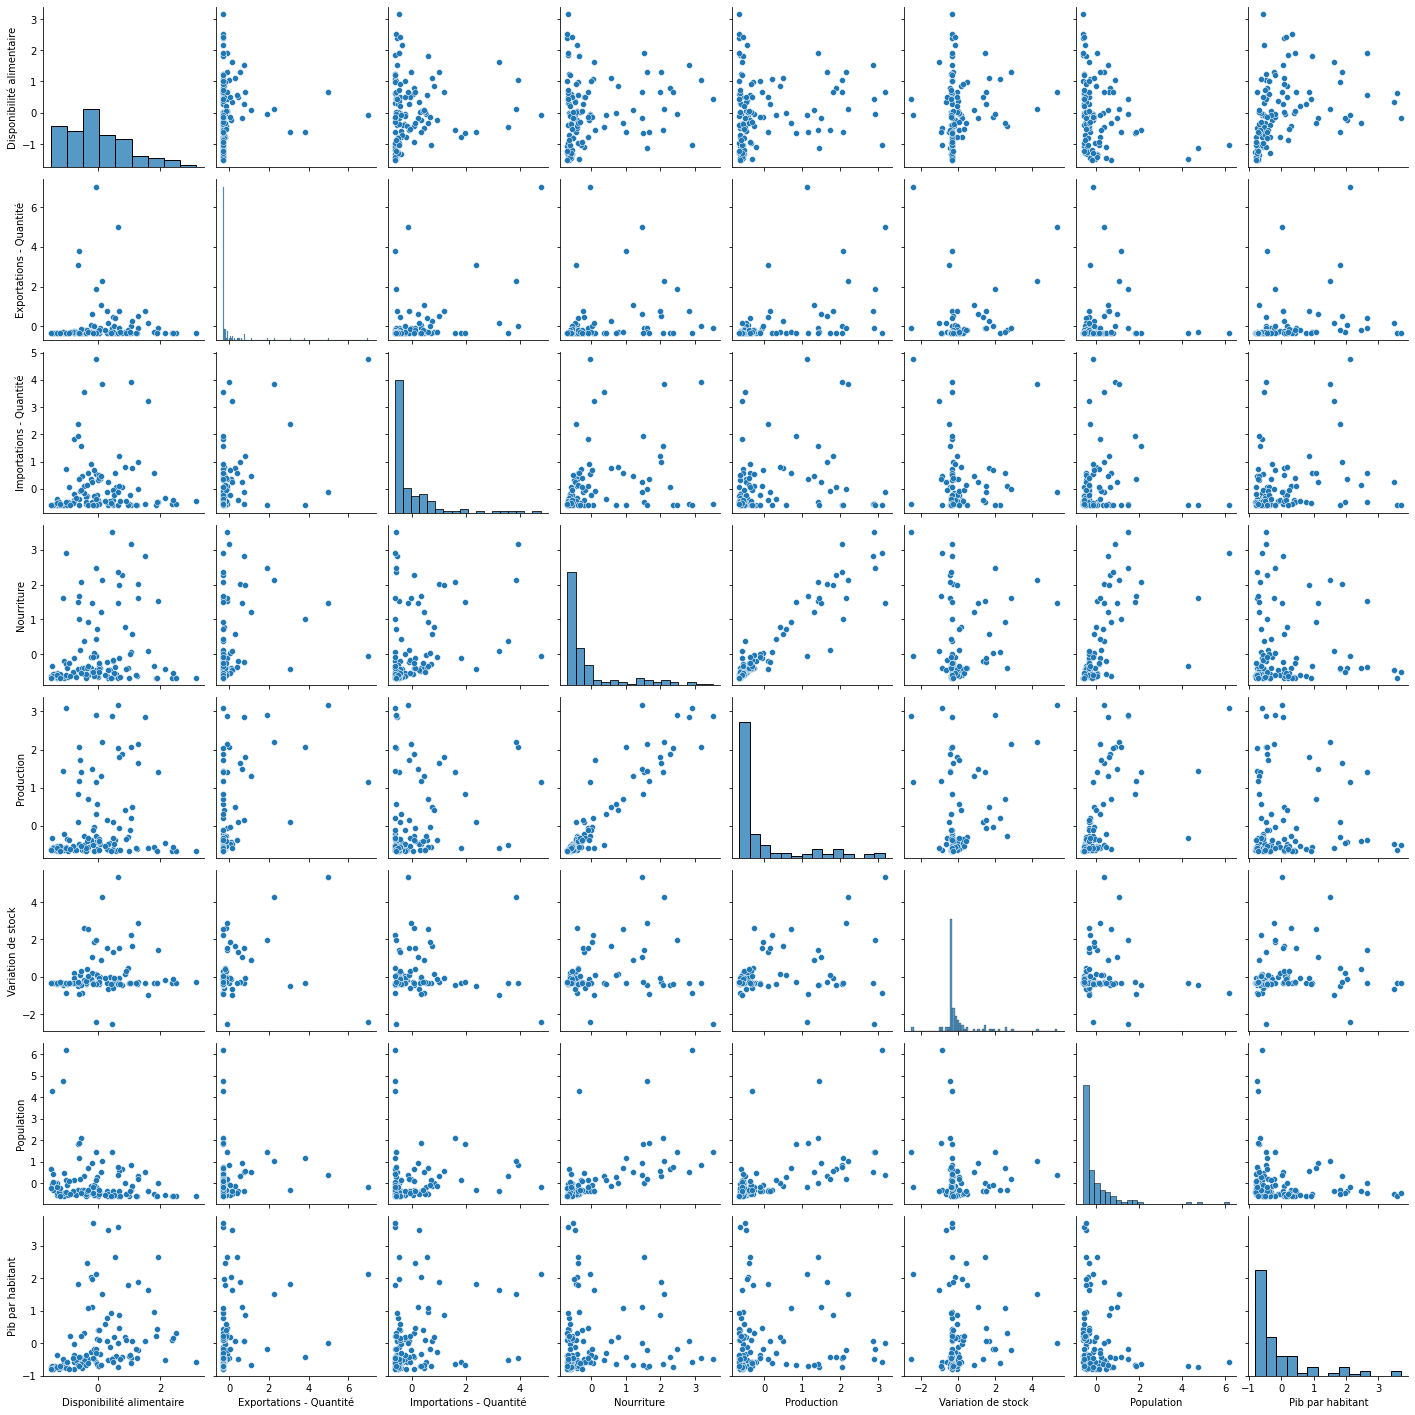

In [ ]:
#visualisation des données
X=pd.DataFrame(df_norm, index=df.index, columns=df.columns)
sns.pairplot(X)
plt.show()

**CLASSIFICATION ASCENDANTE HIERARCHIQUE**




In [ ]:
#données normalisées sous forme de dataframe pour la classification ascendante hierarchique
df_norm_cah = pd.DataFrame(df_norm, index=df.index, columns=df.columns)
df_norm_cah.head()

,Disponibilité alimentaire,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,Population,Pib par habitant
Zone,,,,,,,,
Afrique du Sud,1.048613,0.001296,3.922933,3.160644,2.060784,-0.345706,0.863511,-0.453286
Albanie,-0.356484,-0.325372,-0.276271,-0.611352,-0.633321,-0.244754,-0.523129,-0.549868
Algérie,-1.081929,-0.325372,-0.593858,-0.199620,-0.206564,-0.345706,0.463329,-0.574169
Angola,-0.778085,-0.325372,1.832153,-0.102854,-0.586085,-0.345706,0.166856,-0.575003
Antigua-et-Barbuda,2.386834,-0.325372,-0.549749,-0.691042,-0.654496,-0.345706,-0.594574,0.103106


In [ ]:
#dendrogramme
import scipy.cluster.hierarchy as shc

- Ward

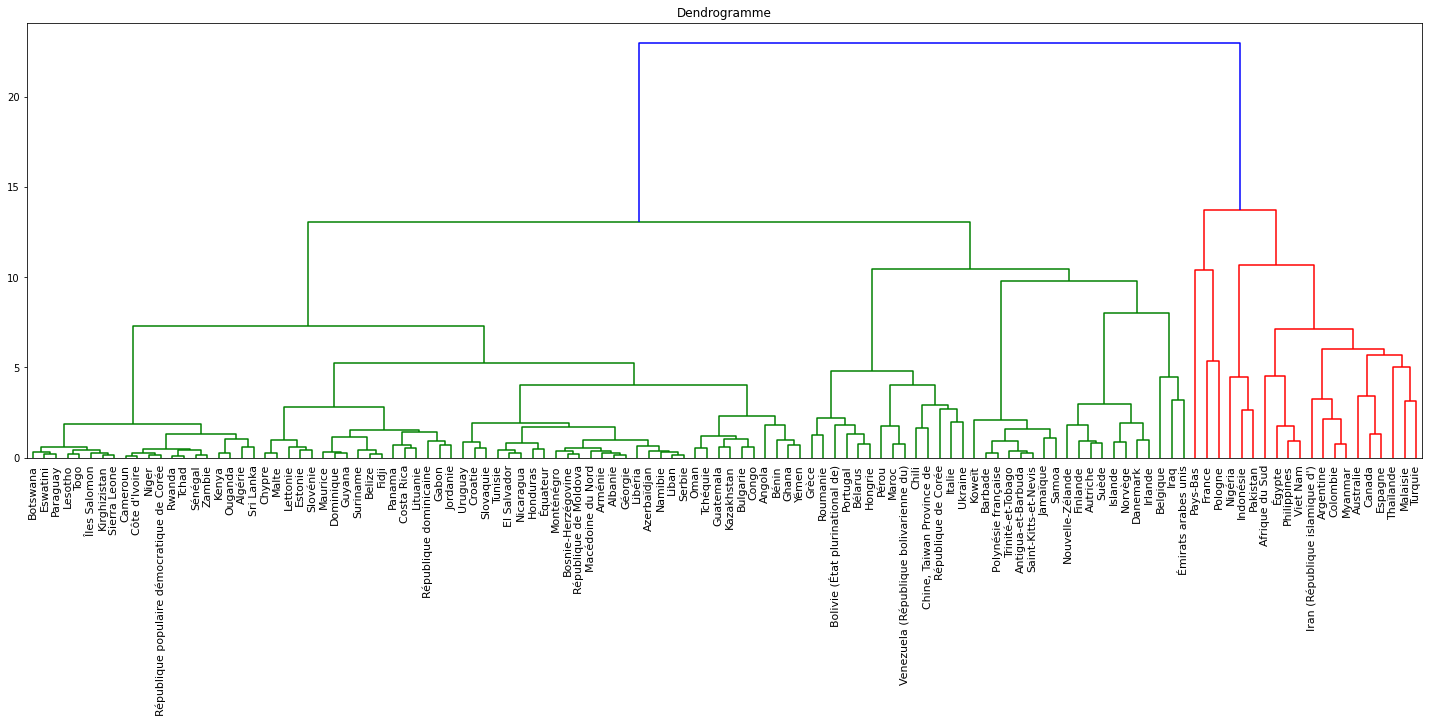

In [ ]:
plt.figure(figsize=(25, 8))  
plt.title("Dendrogramme")  
ward_dend = shc.dendrogram(shc.linkage(df_norm_cah, method='ward'), labels=df.index, leaf_font_size=11)

In [ ]:
# 2 clusters 
from sklearn.cluster import AgglomerativeClustering
cah = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cah_cluster = cah.fit_predict(df_norm_cah)
cah_cluster

#np.bincount(clusters)

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [ ]:
#ajout d'une colonne au dataframe qui associe la zone au cluster auquel elle appartient
df_norm_cah['cah_clusters'] = cah.labels_
df_norm_cah.head()

,Disponibilité alimentaire,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,Population,Pib par habitant,cah_clusters
Zone,,,,,,,,,
Afrique du Sud,1.048613,0.001296,3.922933,3.160644,2.060784,-0.345706,0.863511,-0.453286,0
Albanie,-0.356484,-0.325372,-0.276271,-0.611352,-0.633321,-0.244754,-0.523129,-0.549868,1
Algérie,-1.081929,-0.325372,-0.593858,-0.199620,-0.206564,-0.345706,0.463329,-0.574169,1
Angola,-0.778085,-0.325372,1.832153,-0.102854,-0.586085,-0.345706,0.166856,-0.575003,1
Antigua-et-Barbuda,2.386834,-0.325372,-0.549749,-0.691042,-0.654496,-0.345706,-0.594574,0.103106,1


In [ ]:
#nombre de pays dans chaque clusters
df_norm_cah['cah_clusters'].value_counts()

1    100
0     20
Name: cah_clusters, dtype: int64

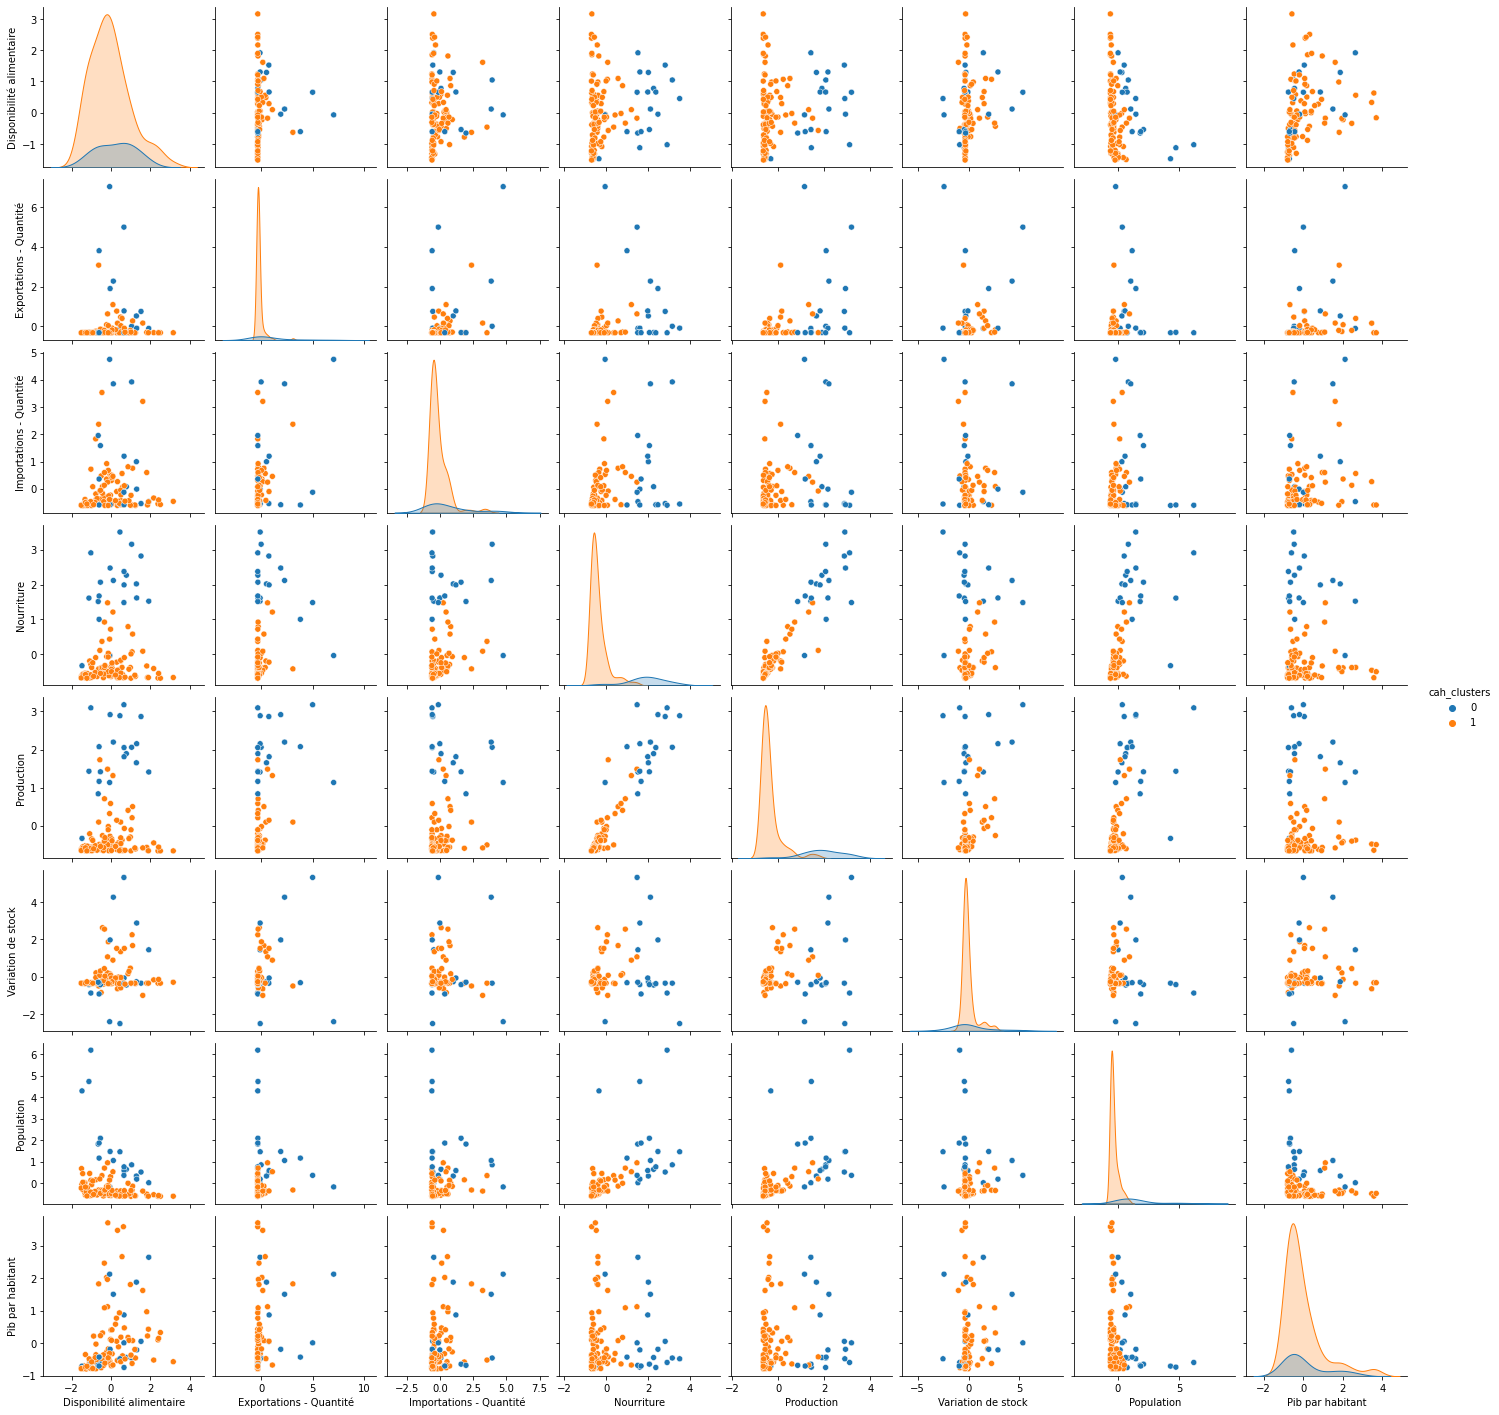

In [ ]:
#représentation des clusters de la classification ascendante hierarchique
sns.pairplot(df_norm_cah, hue='cah_clusters')
plt.show()

In [ ]:
df_norm_cah.groupby('cah_clusters').mean()

,Disponibilité alimentaire,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,Population,Pib par habitant
cah_clusters,,,,,,,,
0,0.214932,0.959263,0.670755,1.887405,1.895701,0.276408,1.520094,0.105397
1,-0.042986,-0.191853,-0.134151,-0.377481,-0.379140,-0.055282,-0.304019,-0.021079


In [ ]:
#informations sur les clusters avec les données de départ(avant normalisation)
df_cah = df.copy()
df_cah['cah_clusters'] = cah.labels_
df_cah.groupby('cah_clusters').mean() 
#les pays qui font partie du cluster 0 ont glogalement des valeurs plus élevés pour toute les variables

,Disponibilité alimentaire,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,Population,Pib par habitant
cah_clusters,,,,,,,,
0,24.2210,247.75,145.35,1363.95,1565.65,24.650000,82638.5903,15421.554583
1,20.6728,25.75,54.11,170.26,169.05,11.507463,11436.8304,13316.264996


In [ ]:
#pays du cluster 0
df_cah[df_cah['cah_clusters']==0].index

Index(['Afrique du Sud', 'Argentine', 'Australie', 'Canada', 'Colombie',
       'Espagne', 'France', 'Indonésie', 'Iran (République islamique d')',
       'Malaisie', 'Myanmar', 'Nigéria', 'Pakistan', 'Pays-Bas', 'Philippines',
       'Pologne', 'Thaïlande', 'Turquie', 'Viet Nam', 'Égypte'],
      dtype='object', name='Zone')

In [ ]:
#pays du cluster 1
df_cah[df_cah['cah_clusters']==1].index

Index(['Albanie', 'Algérie', 'Angola', 'Antigua-et-Barbuda', 'Arménie',
       'Autriche', 'Azerbaïdjan', 'Barbade', 'Belgique', 'Belize',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine', 'Botswana',
       'Bulgarie', 'Bélarus', 'Bénin', 'Cameroun', 'Chili',
       'Chine, Taiwan Province de', 'Chypre', 'Congo', 'Costa Rica', 'Croatie',
       'Côte d'Ivoire', 'Danemark', 'Dominique', 'El Salvador', 'Estonie',
       'Eswatini', 'Fidji', 'Finlande', 'Gabon', 'Ghana', 'Grèce', 'Guatemala',
       'Guyana', 'Géorgie', 'Honduras', 'Hongrie', 'Iraq', 'Irlande',
       'Islande', 'Italie', 'Jamaïque', 'Jordanie', 'Kazakhstan', 'Kenya',
       'Kirghizistan', 'Koweït', 'Lesotho', 'Lettonie', 'Liban', 'Libéria',
       'Lituanie', 'Macédoine du Nord', 'Malte', 'Maroc', 'Maurice',
       'Monténégro', 'Namibie', 'Nicaragua', 'Niger', 'Norvège',
       'Nouvelle-Zélande', 'Oman', 'Ouganda', 'Panama', 'Paraguay',
       'Polynésie française', 'Portugal', 'Pérou', 'Roumanie', 'Rwa

**K-Means**

In [ ]:
#clustering kmeans pour plusieurs taille de clusters 

from sklearn.cluster import KMeans
from sklearn import cluster, metrics

- 'Elbow Method'

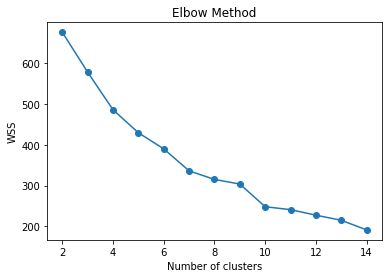

In [ ]:

Sum_of_squared_distances = []

for num_clusters in range(2,15) :
    kmeans = KMeans(n_clusters=num_clusters, init='random', random_state=1)
    
    kmeans.fit(df_norm)
    ssd = kmeans.inertia_ #somme des carrées des variances intra classes
    Sum_of_squared_distances.append(ssd)

plt.plot(range(2,15),Sum_of_squared_distances, marker='o')
plt.xlabel('Number of clusters') 
plt.ylabel('WSS') 
plt.title('Elbow Method')

plt.show()


In [ ]:
Sum_of_squared_distances

[675.6242282964881,
 577.8142137637897,
 485.65230299405846,
 429.368339278009,
 389.90639491966334,
 336.0246161055936,
 315.0397818675349,
 303.7166450339133,
 248.13934341141447,
 241.0046528431689,
 227.47444922686478,
 214.93523209599095,
 191.3638343357252]

Coefficient de silhouette

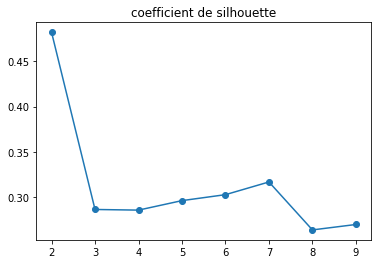

In [ ]:
#pour chacunes de ces tailles calcul du coefficient de silhouette

silhouettes = []

for num_clusters in range(2, 10): 
    cls = cluster.KMeans(n_clusters=num_clusters, init='random', random_state=1)

    cls.fit(df_norm)
    silh = metrics.silhouette_score(df_norm, cls.labels_)
    silhouettes.append(silh)

plt.plot(range(2,10), silhouettes, marker='o')
plt.title('coefficient de silhouette')
plt.show()

# coefficient de silhouette élevé pour 2 ou 6 clusters

In [ ]:
silhouettes

[0.4819718671465124,
 0.2867082092547635,
 0.2859970134675183,
 0.2964623916991453,
 0.30302472487193943,
 0.3170180522686343,
 0.2641834783826298,
 0.2701599723549049]

- Visualisation des clusters

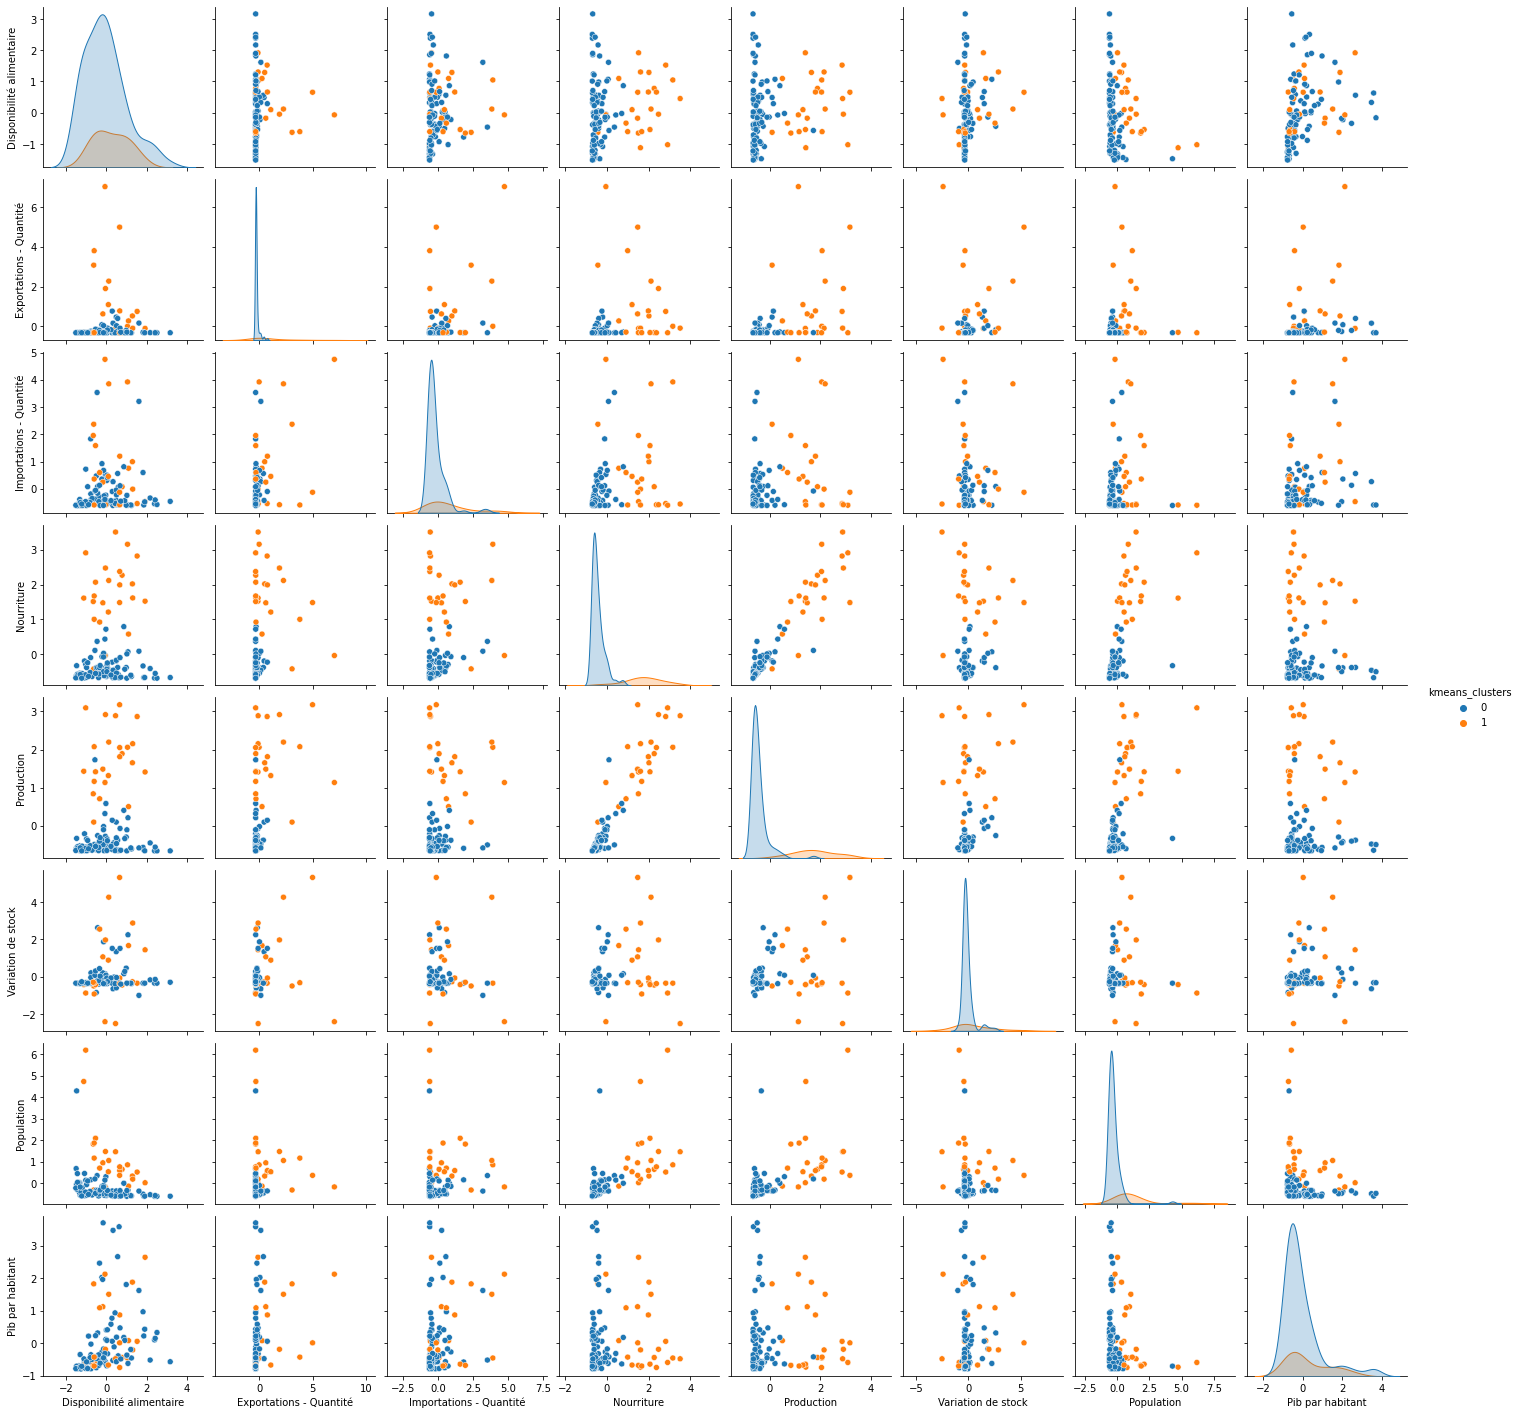

In [ ]:
# k-means clustering avec 2 clusters
kmeans = KMeans(init='random', n_clusters=2, n_init=1, random_state=1)

# association du clustering aux données
kmeans.fit(df_norm)

#données normalisées sous forme de dataframe pour le Kmeans
df_norm_kmeans = pd.DataFrame(df_norm, index=df.index, columns=df.columns)
#clustering kmeans appliqué au dataframe
df_norm_kmeans['kmeans_clusters'] = kmeans.labels_

#visualisation
sns.pairplot(df_norm_kmeans, hue='kmeans_clusters')
plt.show()

- Centroïdes

In [ ]:
#dataframe avec les coordonnées des centroïdes
pd.DataFrame(kmeans.cluster_centers_, index=['cluster0', 'cluster1'], columns=df.columns)

,Disponibilité alimentaire,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,Population,Pib par habitant
cluster0,-0.060787,-0.252887,-0.192188,-0.435765,-0.441270,-0.120472,-0.290550,-0.065149
cluster1,0.243148,1.011547,0.768751,1.743062,1.765081,0.481887,1.162198,0.260595


In [ ]:
#nombre de pays par clusters
df_norm_kmeans['kmeans_clusters'].value_counts()

0    96
1    24
Name: kmeans_clusters, dtype: int64

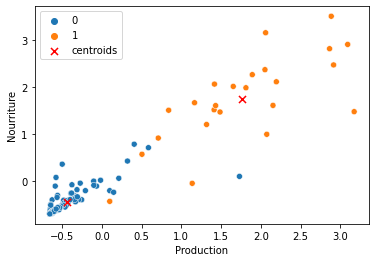

In [ ]:
sns.scatterplot(data=df_norm_kmeans, x="Production", y="Nourriture", hue='kmeans_clusters')
plt.scatter(kmeans.cluster_centers_[:,4], kmeans.cluster_centers_[:,3], 
            marker="x", c="r", s=50, label="centroids")
plt.legend()
plt.show()

**COMPARAISON ENTRE LA CLASSIFICATION ASCENDANTE HIERARCHIQUE ET LE KMEANS**

In [ ]:
#nombre de pays par cluster avec la classification ascendante hiérarchique
df_norm_cah['cah_clusters'].value_counts()

1    100
0     20
Name: cah_clusters, dtype: int64

In [ ]:
#nombre de pays par clusters avec le kmeans
df_norm_kmeans['kmeans_clusters'].value_counts()

0    96
1    24
Name: kmeans_clusters, dtype: int64

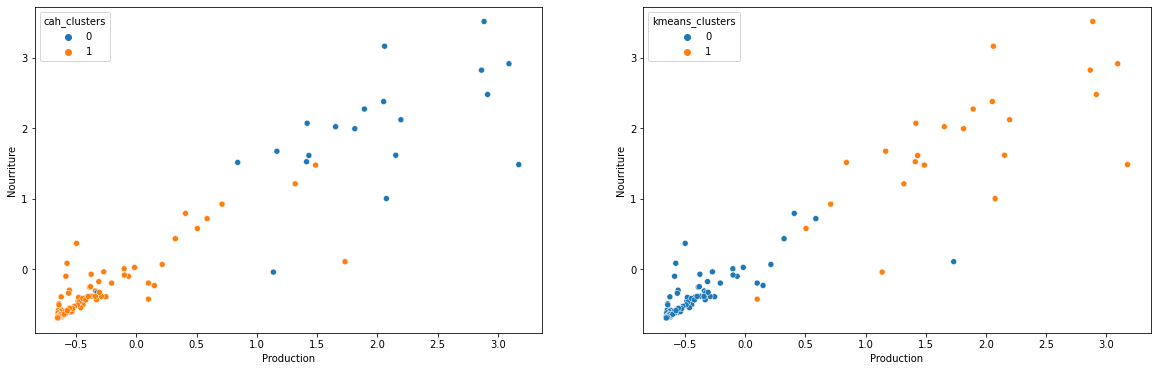

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,6))

#clustering de la classification ascendante hierarchique
sns.scatterplot(data=df_norm_cah, x="Production", y="Nourriture", hue="cah_clusters", ax=ax1)
#clustering kmeans
sns.scatterplot(data=df_norm_kmeans, x="Production", y="Nourriture", hue="kmeans_clusters", ax=ax2)

plt.show()


**ANALYSE EN COMPOSANTES PRINCIPALES**

- Données normalisées

In [ ]:
df_norm_acp = df_norm.copy()

- Composantes principales

In [ ]:
from sklearn import decomposition

In [ ]:
#autant de composantes que de variables 
pca8 = decomposition.PCA(n_components=8)

#association de l'acp aux données
pca8.fit(df_norm_acp)

#pourcentage de la variance expliqué par les composantes
print('Variance', pca8.explained_variance_ratio_)
print()
#pourcentage cumulé de la variance expliqué par les composantes
print('Variance cumulée', pca8.explained_variance_ratio_.cumsum())


Variance [0.36469432 0.20967872 0.13377256 0.11450379 0.07794407 0.06520834
 0.03227439 0.00192381]

Variance cumulée [0.36469432 0.57437304 0.7081456  0.82264939 0.90059346 0.96580179
 0.99807619 1.        ]


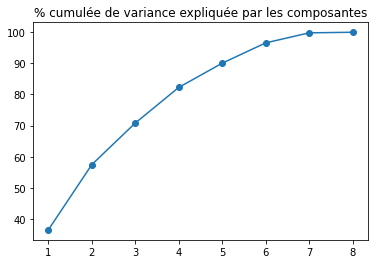

In [ ]:
#visualisation de % cumulée de variance expliquée par les composantes principales
plt.plot((np.arange(pca8.n_components_) + 1), np.cumsum(pca8.explained_variance_ratio_)*100, marker='o')
plt.title('% cumulée de variance expliquée par les composantes')
plt.show()

In [ ]:
#selection des deux premières composantes principales
pca = decomposition.PCA(n_components=2)
pca.fit(df_norm_acp)

PCA(n_components=2)

- Variables

In [ ]:
#mesurer la contribution de chaque variables à chaque composantes (pour les 2 premières composantes)
pcs = pca.components_

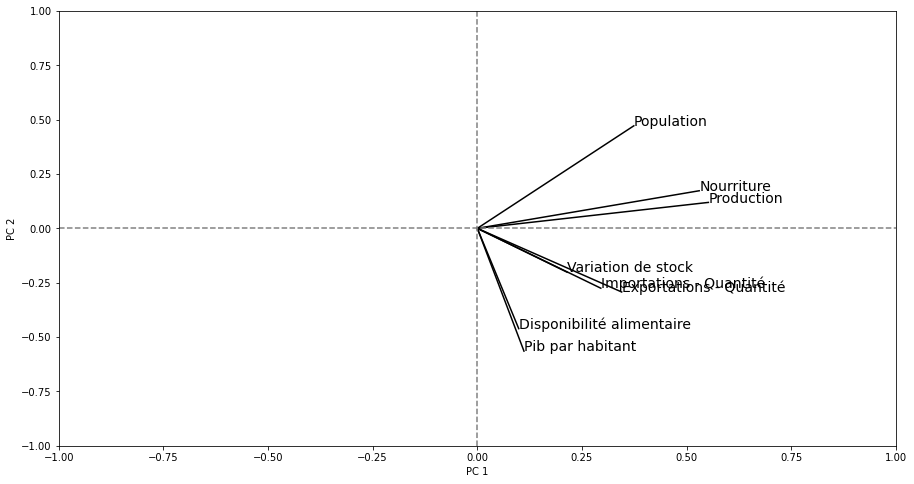

In [ ]:
fig = plt.figure(figsize=(15,8))

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (df.columns[i]) de la performance
    plt.text(x, y, df.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-1, 1], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

plt.xlim([-1, 1])
plt.ylim([-1, 1])


plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.show()

In [ ]:
#contribution de chaque variables à chaque composantes
pd.DataFrame(np.transpose(pca8.components_), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], index=df.columns)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Disponibilité alimentaire,0.098945,-0.461142,-0.513768,-0.476283,-0.354223,0.131814,0.379290,0.006718
Exportations - Quantité,0.344903,-0.292595,0.368219,0.366962,-0.096389,0.655347,0.199908,-0.215523
Importations - Quantité,0.295075,-0.275236,0.560782,-0.090856,-0.407036,-0.571756,0.050011,0.139139
Nourriture,0.530182,0.172951,-0.151819,-0.225995,-0.050797,-0.082285,-0.424761,-0.651996
Production,0.552122,0.119335,-0.166638,-0.022132,0.012640,0.203382,-0.323934,0.711481
Variation de stock,0.214498,-0.201531,-0.472561,0.719423,0.027561,-0.391573,0.125061,-0.052569
Population,0.373921,0.471601,0.058881,-0.139494,0.310570,-0.115217,0.710665,-0.008839
Pib par habitant,0.111465,-0.564629,0.091555,-0.204079,0.774340,-0.107241,-0.087380,0.000415


- Matrice des corrélations

In [ ]:
matrice = pd.DataFrame(df_norm_acp, columns=df.columns, index=df.index)
matrice_corr = matrice.corr()

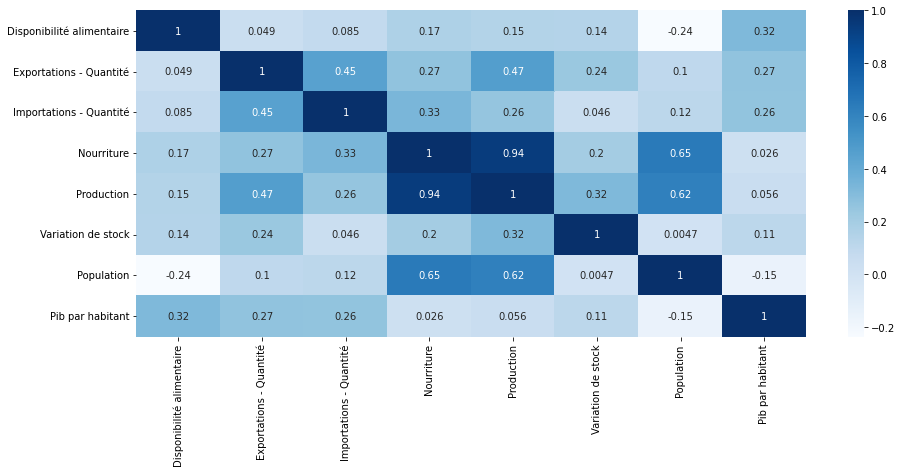

In [ ]:
#heatmap
fig = plt.figure(figsize=(15,6))
sns.heatmap(matrice.corr(), annot=True, cmap='Blues')
plt.show()

- Représentation des variables et des pays sur les deux premiers axes 

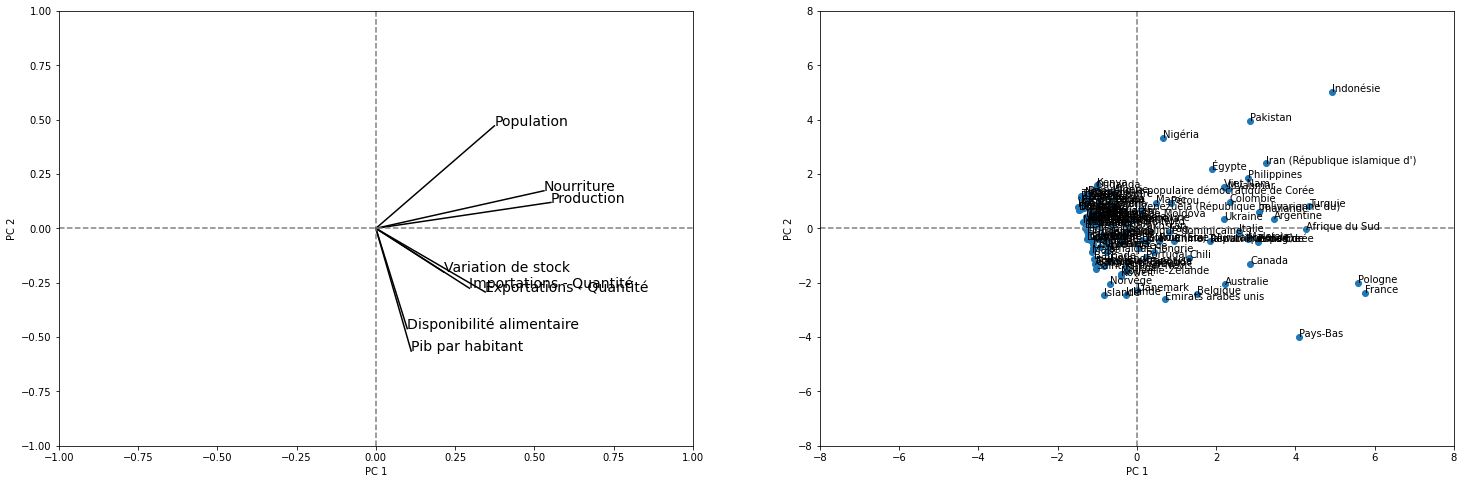

In [ ]:
fig = plt.figure(figsize=(25,8))

# I/ :  REPRENTATION DES VARIABLES

plt.subplot(1, 2, 1)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (df.columns[i]) de la performance
    plt.text(x, y, df.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-1, 1], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


plt.xlim([-1, 1])
plt.ylim([-1, 1])

plt.xlabel('PC 1')
plt.ylabel('PC 2')


#II/ : REPRESENTATION DES DONNÉES

plt.subplot(1, 2, 2)

#(points) pays projetés sur deux axes (les deux composantes principales)
df_projected = pca.transform(df_norm_acp)
df_projected.shape

plt.scatter(df_projected[:, 0], df_projected[:, 1])

for i, (x,y) in enumerate(zip(df_projected[:, 0],
                       df_projected[:, 1])):
    plt.text(x, y, df.index[i])

# Afficher une ligne horizontale y=0
plt.plot([-8, 8], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-8, 8], color='grey', ls='--')

plt.xlim([-8, 8])
plt.ylim([-8, 8])


plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.show()

In [ ]:
#coordonnées des pays sous forme de dataframe
zone = pd.DataFrame(df_projected, index=df.index, columns=['PC1', 'PC2']).reset_index()

In [ ]:
#la première composante oppose le Iles Solomon à la France
print(zone[zone.PC1 == zone.PC1.min()])
print(zone[zone['Zone'] == "Afrique du Sud"])

             Zone       PC1       PC2
119  Îles Salomon -1.481504  0.793582
             Zone      PC1       PC2
0  Afrique du Sud  4.27349 -0.038269


In [ ]:
df[(df.index=='Îles Salomon')|(df.index=="Afrique du Sud")]

,Disponibilité alimentaire,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,Population,Pib par habitant
Zone,,,,,,,,
Afrique du Sud,35.69,63.0,514.0,2035.0,1667.0,0.0,57009.756,6121.876572
Îles Salomon,4.45,0.0,6.0,3.0,0.0,3.0,636.039,1911.431453


In [ ]:
#la deuxième composante opppose les Pays-Bas à l'Indonésie
print(zone[zone.PC2 == zone.PC2.min()])
print(zone[zone.PC2 == zone.PC2.max()])

        Zone       PC1       PC2
81  Pays-Bas  4.082085 -3.992021
         Zone       PC1     PC2
46  Indonésie  4.918942  5.0315


In [ ]:
df[(df.index=='Pays-Bas')|(df.index=='Indonésie')]

,Disponibilité alimentaire,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,Population,Pib par habitant
Zone,,,,,,,,
Indonésie,7.19,0.0,1.0,1904.0,2301.0,-21.0,264650.963,3837.578117
Pays-Bas,20.33,1418.0,608.0,346.0,1100.0,-82.0,17021.347,48989.638816


**ACP : REPRÉSENTATIONS DES CLUSTERS (KMEANS ET CLASSIFICATION ASCENDANTE HIERARCHIQUE)**

In [ ]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=2)
pca.fit(df_norm_acp)
df_norm_trans = pca.transform(df_norm_acp)

In [ ]:
#dataframe 
df_final = pd.DataFrame(df_projected, index=df.index, columns=['PC1', 'PC2'])
df_final['K_Means_cluster']=kmeans.labels_
df_final['CAH_cluster']=cah.labels_
df_final.head()

,PC1,PC2,K_Means_cluster,CAH_cluster
Zone,,,,
Afrique du Sud,4.273490,-0.038269,1,0
Albanie,-1.212213,0.267409,0,1
Algérie,-0.579294,1.310771,0,1
Angola,-0.102563,0.335030,0,1
Antigua-et-Barbuda,-1.050998,-1.320726,0,1


(-6.0, 6.0)

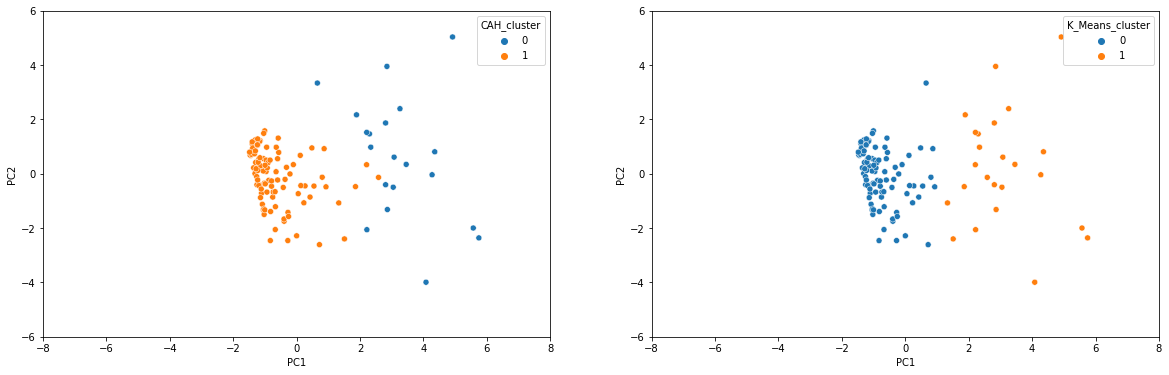

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.scatterplot(x='PC1',y='PC2',data=df_final,hue='CAH_cluster')

plt.xlim([-8, 8])
plt.ylim([-6, 6])

plt.subplot(1,2,2)
sns.scatterplot(x='PC1',y='PC2',data=df_final,hue='K_Means_cluster')

plt.xlim([-8, 8])
plt.ylim([-6, 6])

- Heatmap 

In [ ]:
#ajout des clusters au dataframe de départ(avant normalisation des données)
df['K_Means_cluster']=kmeans.labels_
df['CAH_cluster']=cah.labels_
df.head()

,Disponibilité alimentaire,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,Population,Pib par habitant,K_Means_cluster,CAH_cluster
Zone,,,,,,,,,,
Afrique du Sud,35.69,63.0,514.0,2035.0,1667.0,0.0,57009.756,6121.876572,1,0
Albanie,16.36,0.0,38.0,47.0,13.0,4.0,2884.169,4514.204908,0,1
Algérie,6.38,0.0,2.0,264.0,275.0,0.0,41389.189,4109.701336,0,1
Angola,10.56,0.0,277.0,315.0,42.0,0.0,29816.766,4095.811686,0,1
Antigua-et-Barbuda,54.10,0.0,7.0,5.0,0.0,0.0,95.426,15383.415188,0,1


a) clusters de la classification ascendante hiérarchique

In [ ]:
#couleur verte pour les pays appartenant au cluster 0, rouge pour le cluster 1 de la classification ascendante hiérarchique
cah_colors = df.CAH_cluster.map({0:'green', 1:'red'})

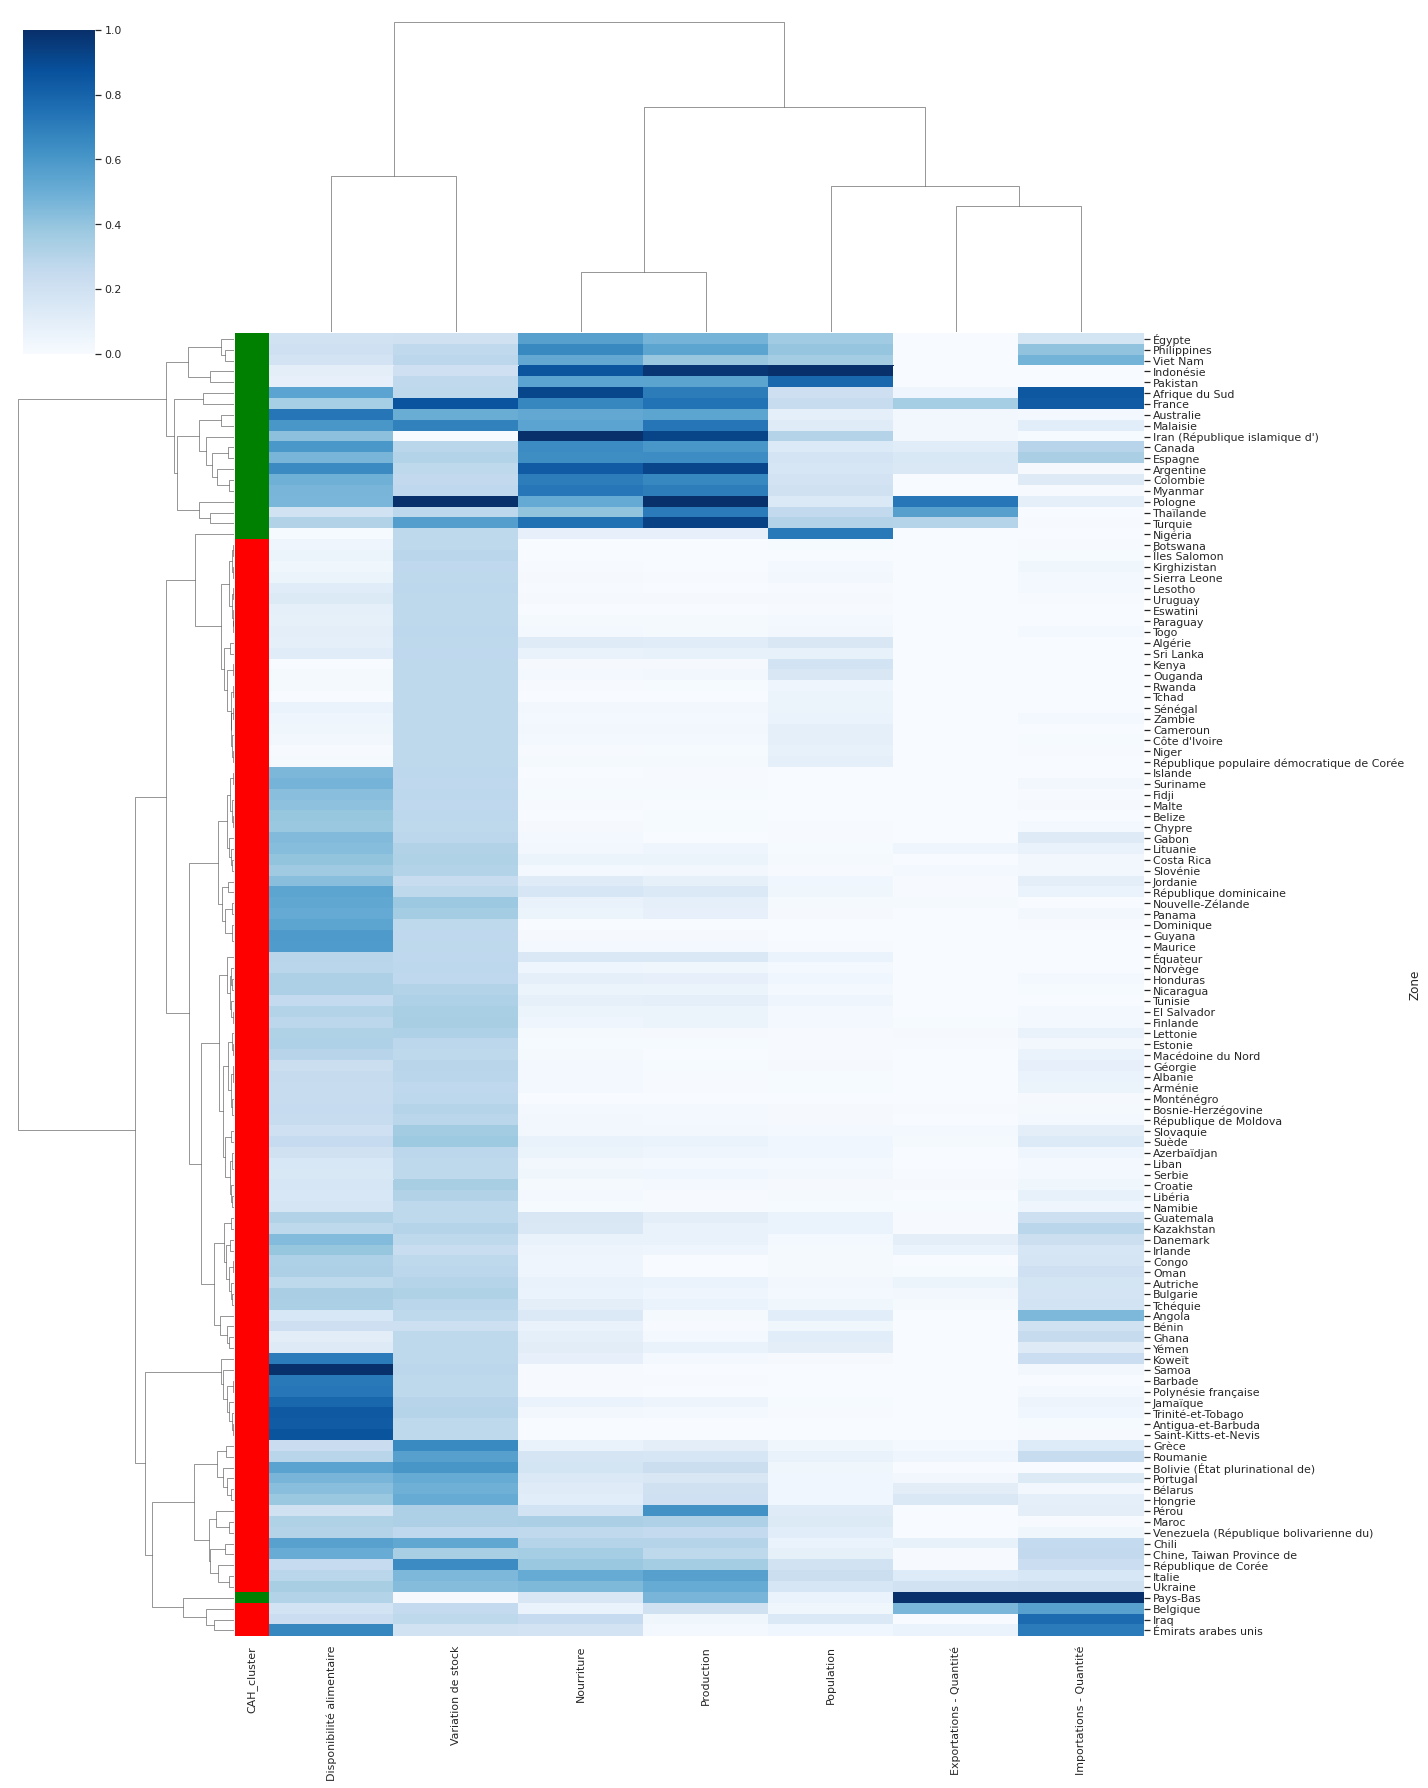

In [ ]:
#clustermap
sns.set(font_scale=1)
heatmap = sns.clustermap(df.iloc[:, 0:7], cmap='Blues', standard_scale=1, method='ward', row_colors=cah_colors, yticklabels=True, figsize=(20,25))
plt.savefig('heatmap.png', dpi=300)

b) clusters du Kmeans

In [ ]:
#couleur verte pour les pays appartenant au cluster 0, rouge pour le cluster 1 du Kmeans
kmeans_colors = df.K_Means_cluster.map({0:'red', 1:'green'})

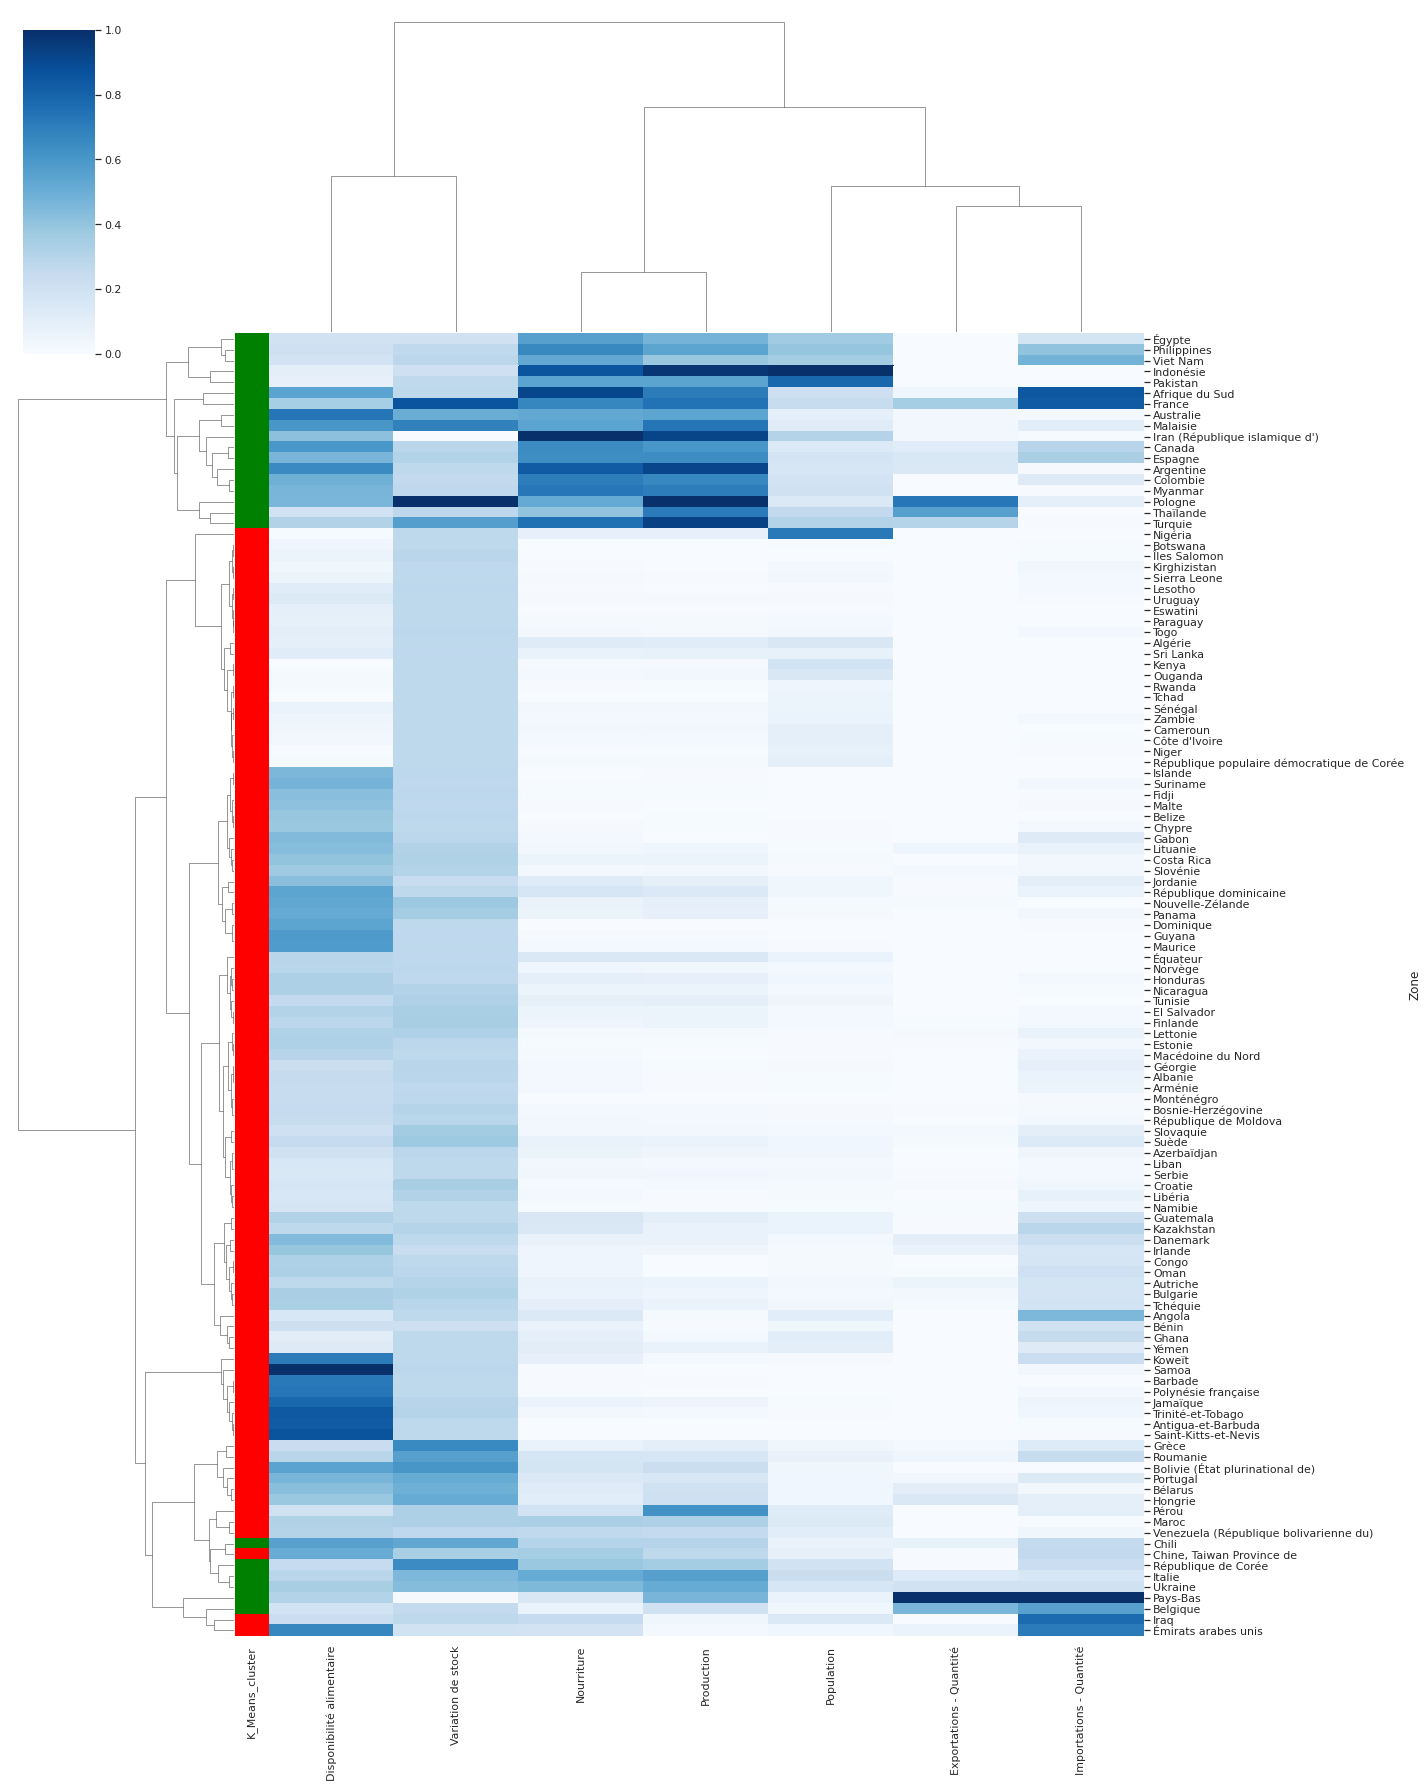

In [ ]:
#clustermap
sns.set(font_scale=1)
heatmap = sns.clustermap(df.iloc[:, 0:7], cmap="Blues", standard_scale=1, method='ward', row_colors=kmeans_colors, yticklabels=True, figsize=(20,25))
plt.savefig('heatmap1.png', dpi=300)

Liste des pays vers lesquels exporter : 
les pays les plus proches/similaires à la France visible sur le plan facoriel des individus et la classification ascendante hiérarchique

-Les Pays-Bas 

-La Pologne 